In [ ]:
import pandas as pd

# Weighted metrics

In this notebook we will try different linear combinations of earlier introduced
single target metrics:

* Initiative Completion Rate (**ICR**)
* Support Tasks Rate (**SupTR**)
* Absent Rate (**AR**)
* Initiative Share by Domain (**ISD**)

Before we get started, some important aspects of further analysis need to be made clear:

1. Why do we need a combination of metrics?

Each metric assesses employees' productivity from a little bit different point of view, so by combining them we can be sure that future model dependencies will not be one-sided.

2. Why do we only use linear weights of fractional value?

As to remind about nature of earlier introduced metrics, they are computed and designed in a way to be a fractional value in interval `[0; 1]`. So we use weights from the same interval to assure the weighted target to be scaled in interval `[0; 1]` as well.

3. On what basis do we decide which weighted metric is "better" or "worse"?

In this notebook we will stick to distribution analysis and sub-sample feature differences analysis only, but on the stage of building models all newly introduced weighted metrics will be additionally evaluated.

In [ ]:
df = pd.read_csv('dataset_quarts.csv')

In [ ]:
df = df.set_index('author')

We will be using dataset with information about 5 quarter periods work of 700+ employees.

In [ ]:
df

,period1,period2,period3,adf_c,adf_ct,adf_ctt,pp_c,pp_ct,kpss_c,kpss_ct,...,daily1,daily2,weekly0,weekly1,weekly2,icr,suptr,ar,isd,target
author,,,,,,,,,,,,,,,,,,,,,
author314_2023-07-01_2023-09-30,11,27,29,0,0,0,0,0,0,0,...,1,1,1,1,1,0.691346,1.000000,1.000000,0.028118,0.679866
author363_2023-07-01_2023-09-30,28,10,19,0,0,0,0,0,0,0,...,1,1,1,1,1,0.936058,0.944231,0.935705,0.061224,0.719305
author286_2023-07-01_2023-09-30,22,13,30,1,1,1,0,0,0,0,...,1,1,1,1,1,0.893269,1.000000,0.971154,0.014966,0.719847
author912_2023-07-01_2023-09-30,31,30,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0.870673,0.987019,0.999038,0.033107,0.722459
author15_2023-07-01_2023-09-30,1,2,28,1,1,1,0,0,0,1,...,0,0,1,1,1,0.882692,1.000000,1.000000,0.010431,0.723281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
author288_2024-07-01_2024-09-30,9,29,21,0,0,0,0,0,0,0,...,1,1,1,1,1,0.000000,1.000000,0.772727,0.500000,0.568182
author255_2024-07-01_2024-09-30,17,21,28,0,0,0,0,0,0,0,...,1,1,1,1,1,0.000000,1.000000,1.000000,0.250000,0.562500
author898_2024-07-01_2024-09-30,1,14,21,1,1,1,0,0,1,0,...,1,1,1,1,1,0.924242,1.000000,1.000000,1.000000,0.981061


Firstly, we create hist plots of all single metrics to look at their distributions.

<Axes: >

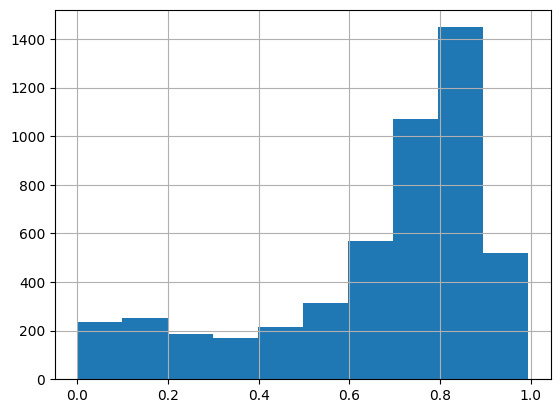

In [ ]:
df['icr'].hist()

<Axes: >

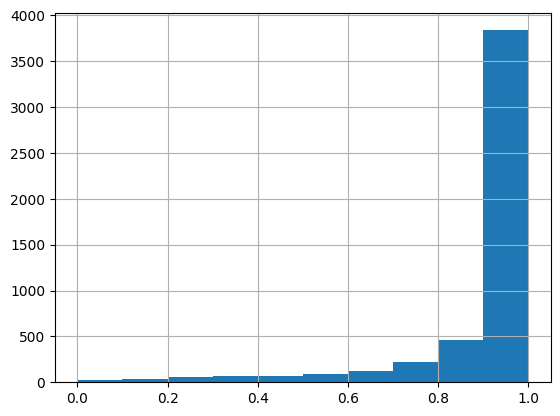

In [ ]:
df['suptr'].hist()

<Axes: >

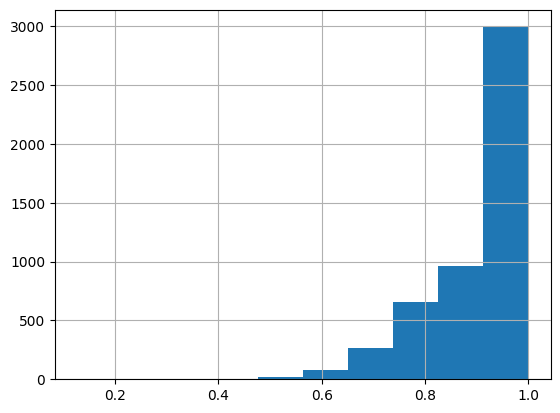

In [ ]:
df['ar'].hist()

<Axes: >

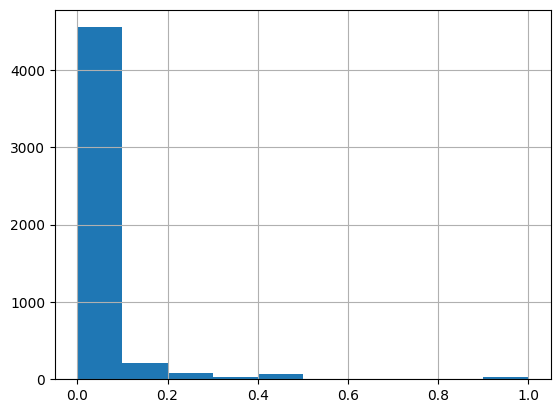

In [ ]:
df['isd'].hist()

As we can see on plots, ICR is more uniformly distributed than other metrics, but still majority of values is in interval `[0.8; 0.9]`. Both SupTR and AR values are also mostly in interval `[0.9; 1.0]`, while ISD hist has its peak at `[0.0; 0.1]`. Combining these metrics may result in more smooth peaks and even more normalized distribution in general.

## **1. Even Target**

We start weighted metric construction with a simple idea of assigning all metrics even weights. All weights should sum to 1 as stated earlier, so we obtain the first weighted metric calling it an "Even strategy":

$target_e = 0.25 \cdot ICR + 0.25 \cdot SupTR + 0.25 \cdot AR + 0.25 \cdot ISD$

In [ ]:
df['target_even'] = df['icr'] * 0.25 + df['suptr'] * 0.25 + df['ar'] * 0.25 + df['isd'] * 0.25

<Axes: >

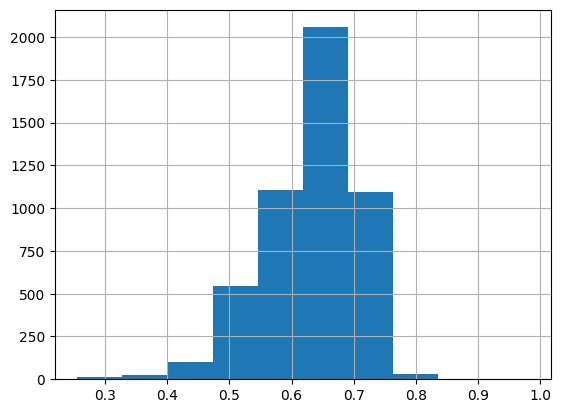

In [ ]:
df['target_even'].hist()

Now distribution looks better as it is centered at `[0.6; 0.7]` and it is also closer to normal.

In [ ]:
df[df['target_even'] < 0.62].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,1832.0,18.649017,8.576297,1.000000,12.000000,20.000000,26.000000,33.000000
period2,1832.0,18.770742,8.463166,1.000000,13.000000,20.000000,26.000000,33.000000
period3,1832.0,18.528930,8.810539,1.000000,11.000000,19.000000,26.000000,33.000000
adf_c,1832.0,0.064410,0.245550,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,1832.0,0.085153,0.279185,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,1832.0,0.102074,0.302829,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,1832.0,0.002729,0.052185,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,1832.0,0.003275,0.057150,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,1832.0,0.027293,0.162979,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,1832.0,0.057860,0.233543,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df[(df['target_even'] >= 0.62) & (df['target_even'] < 0.7)].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,2280.0,18.512719,9.254901,1.000000,13.000000,20.000000,26.000000,33.000000
period2,2280.0,18.627632,8.856886,1.000000,13.000000,20.000000,26.000000,33.000000
period3,2280.0,18.882018,8.779970,1.000000,13.000000,20.000000,26.000000,33.000000
adf_c,2280.0,0.100000,0.300066,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,2280.0,0.115789,0.320042,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,2280.0,0.126754,0.332771,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,2280.0,0.003509,0.059144,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,2280.0,0.003070,0.055336,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,2280.0,0.069737,0.254759,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,2280.0,0.090789,0.287373,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df[df['target_even'] >= 0.7].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,865.0,15.793064,10.687586,1.000000,3.000000,16.000000,26.000000,32.000000
period2,865.0,16.715607,10.292934,1.000000,6.000000,18.000000,26.000000,33.000000
period3,865.0,17.855491,9.604261,1.000000,9.000000,19.000000,26.000000,33.000000
adf_c,865.0,0.201156,0.401096,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,865.0,0.203468,0.402811,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,865.0,0.213873,0.410275,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,865.0,0.032370,0.177083,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,865.0,0.036994,0.188857,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,865.0,0.183815,0.387557,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,865.0,0.228902,0.420369,0.000000,0.000000,0.000000,0.000000,1.000000


We have splitted input data into 3 sub-samples to compare statistics of each feature in different groups based on value of target. For now boundaries of split and number of splits are approximate and will be clarified later after building models. This split performed and boundaries chosen are just for the start and distribution analysis sake.

We will have a closer look on comparison of some features' means:

|feature|target<0.62|0.62<target<0.7|target>0.7|
|----|----|----|---|
|period1 |18.65|18.51|15.79|
|period2 |18.77|18.63|16.72|
|period3 |18.53|18.88|17.86|
|adf_c |0.06|0.10|0.20|
|max |98.50|75.45|46.86|
|var |374.16|240.86|124.31|

It is clear that on average employees with higher metric have less period, less max and variance of their physical worklog and their physical worklog tends to be stationary more often. This shows to some extent that more productive employees log their work more often (several times a day or each work day) than those with lesser target values (several times a week, by the end of week or several times a month).

## **2. Initiative focus Target**

We continue metrics construction attempts with more advance idea of assigning bigger weights to metrics that show initiative impact (ICR, ISD), which is logical in terms of employee's performance. With this said we obtain our second weighted metric calling it "Initiative strategy":

$target_i = 0.40 \cdot ICR + 0.10 \cdot SupTR + 0.10 \cdot AR + 0.40 \cdot ISD$

In [ ]:
df['target_initiative_focus'] = df['icr'] * 0.40 + df['suptr'] * 0.10 + df['ar'] * 0.10 + df['isd'] * 0.40

<Axes: >

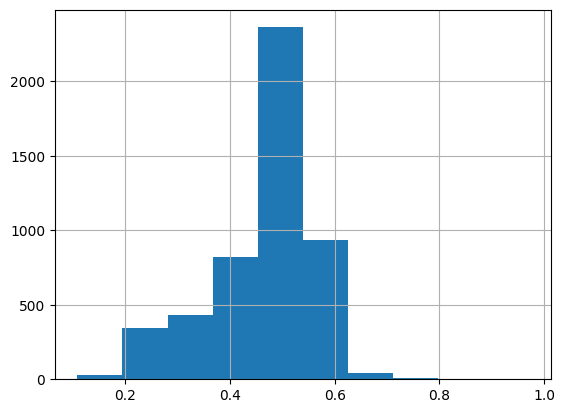

In [ ]:
df['target_initiative_focus'].hist()

Again distribution is more balanced than single metrics in separate. This one specifically contains majority of its values around 0.5, which is better in terms of distribution we would like to achieve ideally.

In [ ]:
df[df['target_initiative_focus'] < 0.4].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,1037.0,18.981678,8.655050,1.000000,13.000000,20.000000,26.000000,32.000000
period2,1037.0,19.005786,8.385382,1.000000,13.000000,20.000000,26.000000,32.000000
period3,1037.0,18.793635,8.484703,1.000000,13.000000,19.000000,26.000000,33.000000
adf_c,1037.0,0.075217,0.263868,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,1037.0,0.095468,0.294002,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,1037.0,0.108004,0.310535,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,1037.0,0.002893,0.053734,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,1037.0,0.002893,0.053734,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,1037.0,0.036644,0.187977,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,1037.0,0.076181,0.265416,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df[(df['target_initiative_focus'] >= 0.4) & (df['target_initiative_focus'] < 0.55)].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,3195.0,18.325822,9.100700,1.000000,12.000000,20.000000,26.000000,33.000000
period2,3195.0,18.543662,8.875410,1.000000,12.000000,20.000000,26.000000,33.000000
period3,3195.0,18.716432,8.878310,1.000000,12.000000,20.000000,26.500000,33.000000
adf_c,3195.0,0.095462,0.293898,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,3195.0,0.110485,0.313543,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,3195.0,0.124570,0.330282,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,3195.0,0.004695,0.068369,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,3195.0,0.005008,0.070600,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,3195.0,0.065728,0.247844,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,3195.0,0.085133,0.279123,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df[df['target_initiative_focus'] >= 0.55].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,745.0,15.838926,10.825639,1.000000,3.000000,16.000000,26.000000,32.000000
period2,745.0,16.593289,10.170308,1.000000,6.000000,18.000000,26.000000,33.000000
period3,745.0,17.655034,9.774909,1.000000,9.000000,19.000000,26.000000,32.000000
adf_c,745.0,0.183893,0.387657,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,745.0,0.193289,0.395143,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,745.0,0.202685,0.402269,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,745.0,0.030872,0.173088,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,745.0,0.034899,0.183648,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,745.0,0.161074,0.367846,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,745.0,0.214765,0.410935,0.000000,0.000000,0.000000,0.000000,1.000000


Feature means comparison between groups leads to the same conclusion that was presented after Even metric analysis.

## **3. Absence focus Target**

The last idea of metric construction is assigning bigger weight to AR, which shows how much time was employee absent from work. While we do that, we also lower weights of initiative metrics only slightly. With this said we obtain our third weighted metric calling it "Absent strategy":

$target_a = 0.20 \cdot ICR + 0.20 \cdot SupTR + 0.50 \cdot AR + 0.10 \cdot ISD$

In [ ]:
df['target_absence_focus'] = df['icr'] * 0.20 + df['suptr'] * 0.20 + df['ar'] * 0.50 + df['isd'] * 0.10

<Axes: >

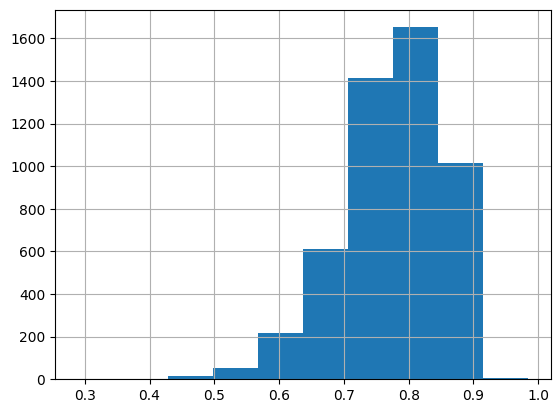

In [ ]:
df['target_absence_focus'].hist()

Obtained distribution is obviously skewed towards 1 because of large impact of AR, but its peak at 0.8 is smoothed.

In [ ]:
df[df['target_absence_focus'] < 0.7].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,782.0,18.378517,8.585337,1.000000,11.000000,19.000000,26.000000,33.000000
period2,782.0,18.232737,8.606763,1.000000,11.000000,19.500000,26.000000,32.000000
period3,782.0,17.570332,8.957120,1.000000,10.000000,17.000000,25.750000,33.000000
adf_c,782.0,0.049872,0.217820,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,782.0,0.062660,0.242505,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,782.0,0.084399,0.278163,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,782.0,0.005115,0.071382,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,782.0,0.005115,0.071382,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,782.0,0.007673,0.087313,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,782.0,0.017903,0.132683,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df[(df['target_absence_focus'] >= 0.7) & (df['target_absence_focus'] < 0.8)].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,2059.0,18.954832,8.732968,1.000000,13.000000,21.000000,26.000000,32.000000
period2,2059.0,19.066051,8.552786,1.000000,13.000000,20.000000,26.000000,33.000000
period3,2059.0,18.925206,8.710172,1.000000,13.000000,20.000000,27.000000,33.000000
adf_c,2059.0,0.064594,0.245869,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,2059.0,0.086935,0.281809,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,2059.0,0.099077,0.298838,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,2059.0,0.001457,0.038152,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,2059.0,0.001943,0.044044,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,2059.0,0.031569,0.174891,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,2059.0,0.061195,0.239745,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df[df['target_absence_focus'] >= 0.8].describe().T

,count,mean,std,min,25%,50%,75%,max
period1,2136.0,17.151217,10.060849,1.000000,10.000000,18.000000,26.000000,33.000000
period2,2136.0,17.698034,9.529843,1.000000,11.000000,19.000000,26.000000,33.000000
period3,2136.0,18.602060,9.139608,1.000000,12.000000,20.000000,26.000000,33.000000
adf_c,2136.0,0.162921,0.369380,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ct,2136.0,0.172285,0.377716,0.000000,0.000000,0.000000,0.000000,1.000000
adf_ctt,2136.0,0.183052,0.386800,0.000000,0.000000,0.000000,0.000000,1.000000
pp_c,2136.0,0.015918,0.125186,0.000000,0.000000,0.000000,0.000000,1.000000
pp_ct,2136.0,0.017322,0.130499,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_c,2136.0,0.139045,0.346074,0.000000,0.000000,0.000000,0.000000,1.000000
kpss_ct,2136.0,0.173689,0.378931,0.000000,0.000000,0.000000,0.000000,1.000000


Again the results of comparison are same: employees with bigger target value log their work more often.

As a result of analysis in this notebook we have obtained 3 slightly different weighted metric strategies: **Even**, **Initiative** and **Absent**. For each of those we performed a split and evaluated feature mean differences between sub-samples. All of them to some extent showed important dependencies between growth of metric and most of the key features' behavior.

We will proceed with comparing weighted metrics and resolving features' dependencies on stage of building models.